## Week 2 Review

Topics:



In [2]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import imp

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
# caller = imp.load_source('caller', '/Users/kiefer/github-repos/DSI-SF-4/utils/student_caller/caller.py')
# sc = caller.StudentCaller()
# sc.load_resource(resource='students')

In [4]:
d = pd.read_csv('/Users/austinwhaley/Desktop/DSI-SF-4-austinmwhaley/datasets/pretrial_inmates_ct/accused_pretrial_inmates_ct.csv')

In [5]:
d.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,NONE
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,NONE
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,NONE
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,NONE
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,NONE


In [6]:
d.OFFENSE.unique()

array(['ASSAULT, THIRD DEGREE                 AM',
       'FAILURE TO APPEAR, SECOND DEGREE      AM',
       'EVADING RESPONSIBILITY                 M',
       'CRIMINAL POSSESSION OF A PISTOL       DF',
       'BREACH OF PEACE                       BM',
       'VIOLATION OF PROBATION OR COND DISCHG',
       'CARRYING WEAPONS WITHOUT A PERMIT      F',
       'STRANGULATION 2ND DEGREE              DF',
       'SALE OF HEROIN, COC BY NON-DEPENDENT',
       'ASSAULT, FIRST DEGREE                 BF',
       'SALE OF CONTROLLED SUBSTANCE           F',
       'ARSON, FIRST DEGREE                   AF',
       'CRIM VIOL OF PROTECTIVE ORDER         DF',
       'EMPLOYING MINOR IN OBSCENE PERFORMNCE AF',
       'ASSAULT, SECOND DEGREE                DF',
       'ROBBERY, FIRST DEGREE                 BF',
       'SEXUAL ASSAULT, FIRST DEGREE           F',
       'SALE OF NARC/AMPHET BY NON-DEPENDENT   F',
       'ROBBERY, THIRD DEGREE                 DF',
       'POSSESSION OF NARCOTICS',
    

In [7]:
d.dtypes

DOWNLOAD DATE                                       object
IDENTIFIER                                          object
LATEST ADMISSION DATE                               object
RACE                                                object
GENDER                                              object
AGE                                                  int64
BOND AMOUNT                                          int64
OFFENSE                                             object
FACILITY                                            object
DETAINER                                            object
dtype: object

In [8]:
#Split-Apply-Combine
#1. What is the mean and standard deviation of the age by gender?

In [9]:
#My Way
group = d.groupby(['GENDER'])['AGE']
print group.std(), '\n\n'
print group.mean()

GENDER
F    10.165089
M    11.334901
Name: AGE, dtype: float64 


GENDER
F    33.660816
M    33.629099
Name: AGE, dtype: float64


In [10]:
#Labels vs Columns
#Labels are not considered part of the data like columns are
#Columns are part of the data that we are able to use with our data

In [11]:
#Another Solution
age_by_gender = pd.pivot_table(data=d, columns='GENDER', values='AGE', aggfunc=[np.mean, np.std])
age_by_gender

,mean,std
GENDER,,
F,33.660816,10.165089
M,33.629099,11.334901


In [12]:
abg_reset = age_by_gender.reset_index()
abg_reset

,GENDER,mean,std
0,F,33.660816,10.165089
1,M,33.629099,11.334901


In [13]:
#2. for age by gender and abg_reset, get out the value of male mean age
mean_age_1 = age_by_gender.ix['F', 'mean']
mean_age_1

33.660816395855747

In [14]:
mean_age_2 = age_by_gender.ix['F', 'mean']
mean_age_2

33.660816395855747

In [15]:
mask = age_by_gender['mean'] == 'M'
age_by_gender[mask]['mean']

/Users/austinwhaley/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/ops.py:716: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [ ]:
#Correct
#mask = abg_reset['GENDER'] == 'M'
#abg_reset[mask]['mean']

abg_reset['mean'][abg_reset['GENDER'] == 'M'] #<- Better Way '''USE THIS IN REVIEW DOC FOR MASKING!!!'''

#Example
#dataframe['subsection'][mask condition to return]

In [ ]:
# 3. get mean and std of age by race (with split-apply-combine)

In [ ]:
group = d.groupby(['RACE'])['AGE']
group_std = group.std()
group_mean = group.mean()
#print group_std
#print group_mean

In [ ]:
# 4. Combine mean_race and std_race into a single df using race as a key
'''
This would use the merge function and we would also need to use the reset_index function to convert our Series
into dataframes inside our merge function
'''

In [ ]:
pd.merge(group_std.reset_index(), group_mean.reset_index(), 
         how='inner', on='RACE', suffixes=('_std','_mean'))

In [ ]:
# 5. Mean age and mean bond amount for gender-by-race

In [ ]:
d.groupby(['GENDER','RACE']).mean()

In [ ]:
# 6. Create a new column 'offense_code' w/ the code of the offense if it exists (otherwise nan)

In [ ]:
d['OFFENSE'].head()

In [ ]:
def parse_code(x):
    x = x.split()
    #print x
    if len(x[-1]) < 3:
        return x[-1]
    else:
        return np.nan

offense_code = d['OFFENSE'].map(parse_code)

In [ ]:
d.insert(8, 'offense_code', offense_code)

In [ ]:
d.head()

In [ ]:
# 7. Make a long-format df with IDENTIFIER as the id column and the data on RACE, GENDER, AGE and offense_code in 
#    the variable and value columns. 

d_long = pd.melt(d, id_vars='IDENTIFIER', value_vars=['RACE', 'GENDER', 'AGE', 'offense_code'])

In [ ]:
d.head(0)

In [ ]:
# How many different facilities are there
d['FACILITY'].value_counts()

In [ ]:
def get_second(x):
    x = x.split()
    if len(x[-1]) == 2:
        return  x[-1]
    else:
        return np.nan

second_word = d['FACILITY'].map(get_second)

In [ ]:
d.insert(9, 'second_word', second_word)

In [ ]:
d.head()

In [ ]:
# Group By Offense, gender, race 

In [ ]:
gdf = d.groupby(['GENDER','RACE']).agg(len)

In [ ]:
#sort by OFFENSE column

In [ ]:
#gdf = gdf.reset_index()
#gdf.sort_values(by='OFFENSE', ascending=False)

In [ ]:
# Sort by OFFENSE count within multi-index df

In [ ]:
'''This is an example of sorting a multi-level index'''
# 
gdf.sort_values(by=['OFFENSE'], ascending=[False]).sort_index(level='GENDER', ascending=False)

In [ ]:
# reset index, group by gender, select only gender subgroup female or 'F'

In [ ]:
gdf = gdf.reset_index()
gdf = gdf.groupby('GENDER')
gdf.get_group('F')

## Plotting

In [ ]:
# 1. Plot a hist of the bond amount

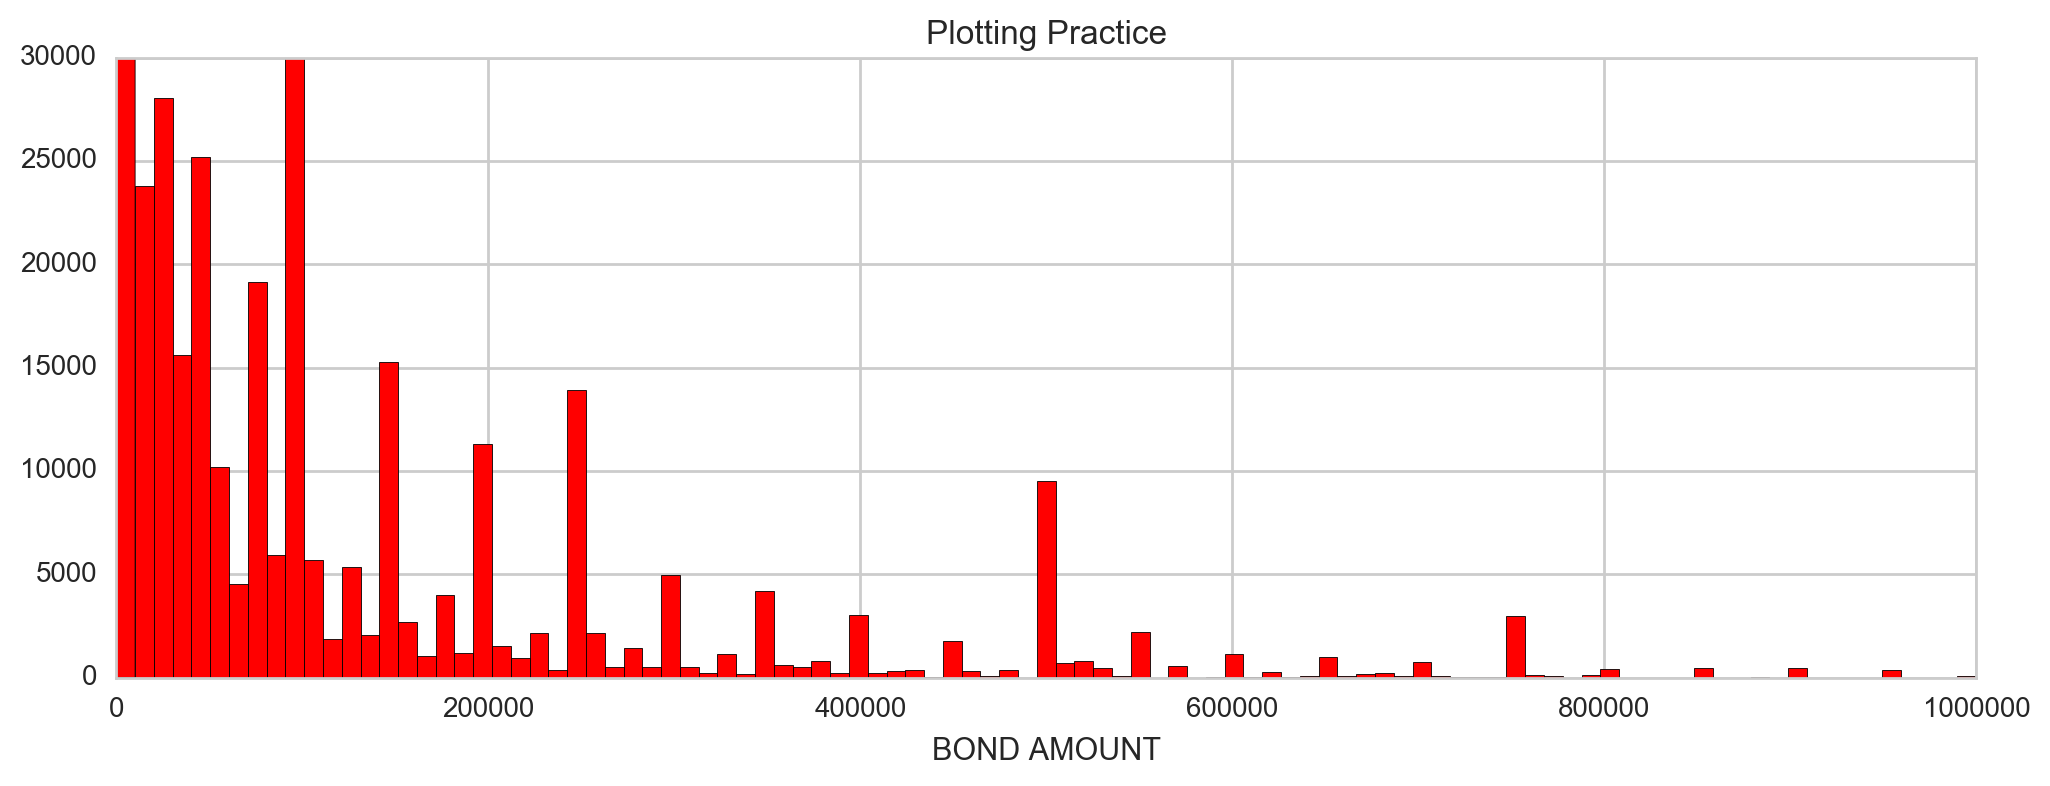

In [31]:
fig, ax = plt.subplots(1,1, figsize=(12,4))

ax = sns.distplot(d['BOND AMOUNT'], hist=True, kde=False, ax=ax, bins=500, color='red', hist_kws={'alpha': 1}) #Kde = Kernel Density Estimator

ax.set_xlim([0,1000000])
ax.set_ylim([0,30000])
ax.set_title('Plotting Practice')

In [ ]:
# 2. Plot age distribution of white and hispanic people on the same chart

In [38]:
d.head(0)

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER


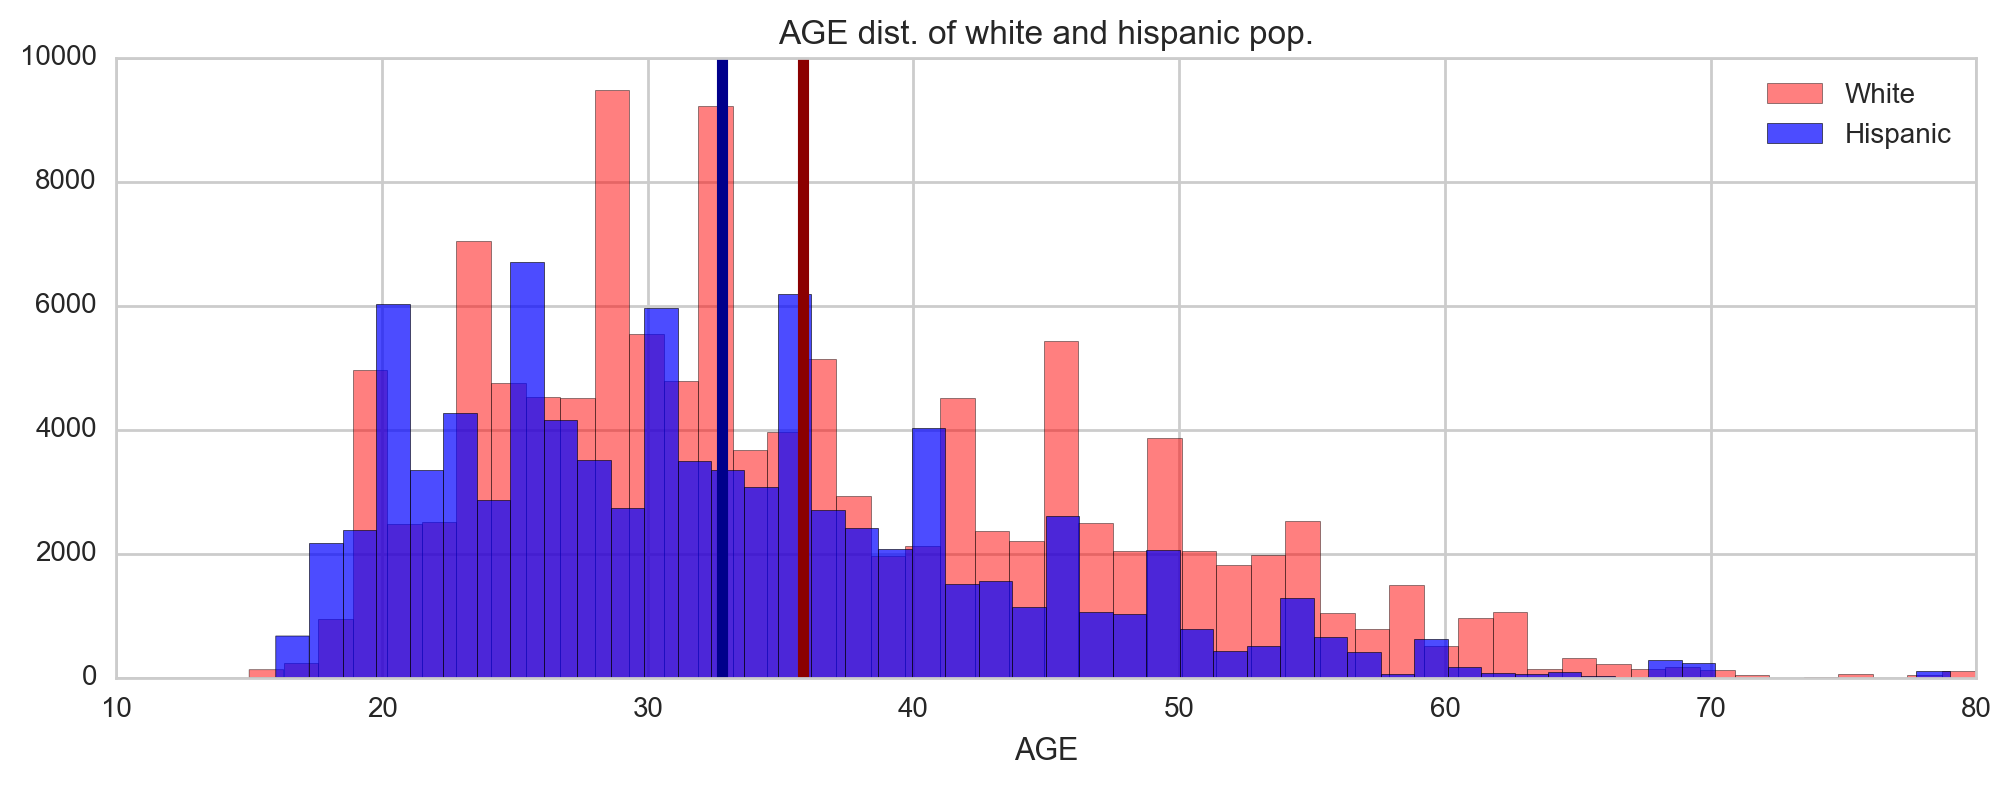

In [63]:
bins=50

fig, ax = plt.subplots(1,1, figsize=(12, 4))

group1 = d['AGE'][d['RACE'] == 'WHITE']
group2 = d['AGE'][d['RACE'] == 'HISPANIC']

sns.distplot(group1, hist=True, kde=False, color='red', ax=ax, bins=bins, 
             hist_kws={'alpha':0.5},label='White')

ax.axvline(x=np.mean(d[d['RACE']== 'WHITE']['AGE']), lw=4, color='darkred')

sns.distplot(group2, hist=True, kde=False, color='blue', ax=ax, bins=bins, 
             hist_kws={'alpha':0.7}, label='Hispanic')

ax.axvline(x=np.mean(d[d['RACE']== 'HISPANIC']['AGE']), lw=4, color='darkblue')

ax.set_title('AGE dist. of white and hispanic pop.')
ax.legend(loc='upper right')

plt.show()

In [ ]:
#age vs bond amount

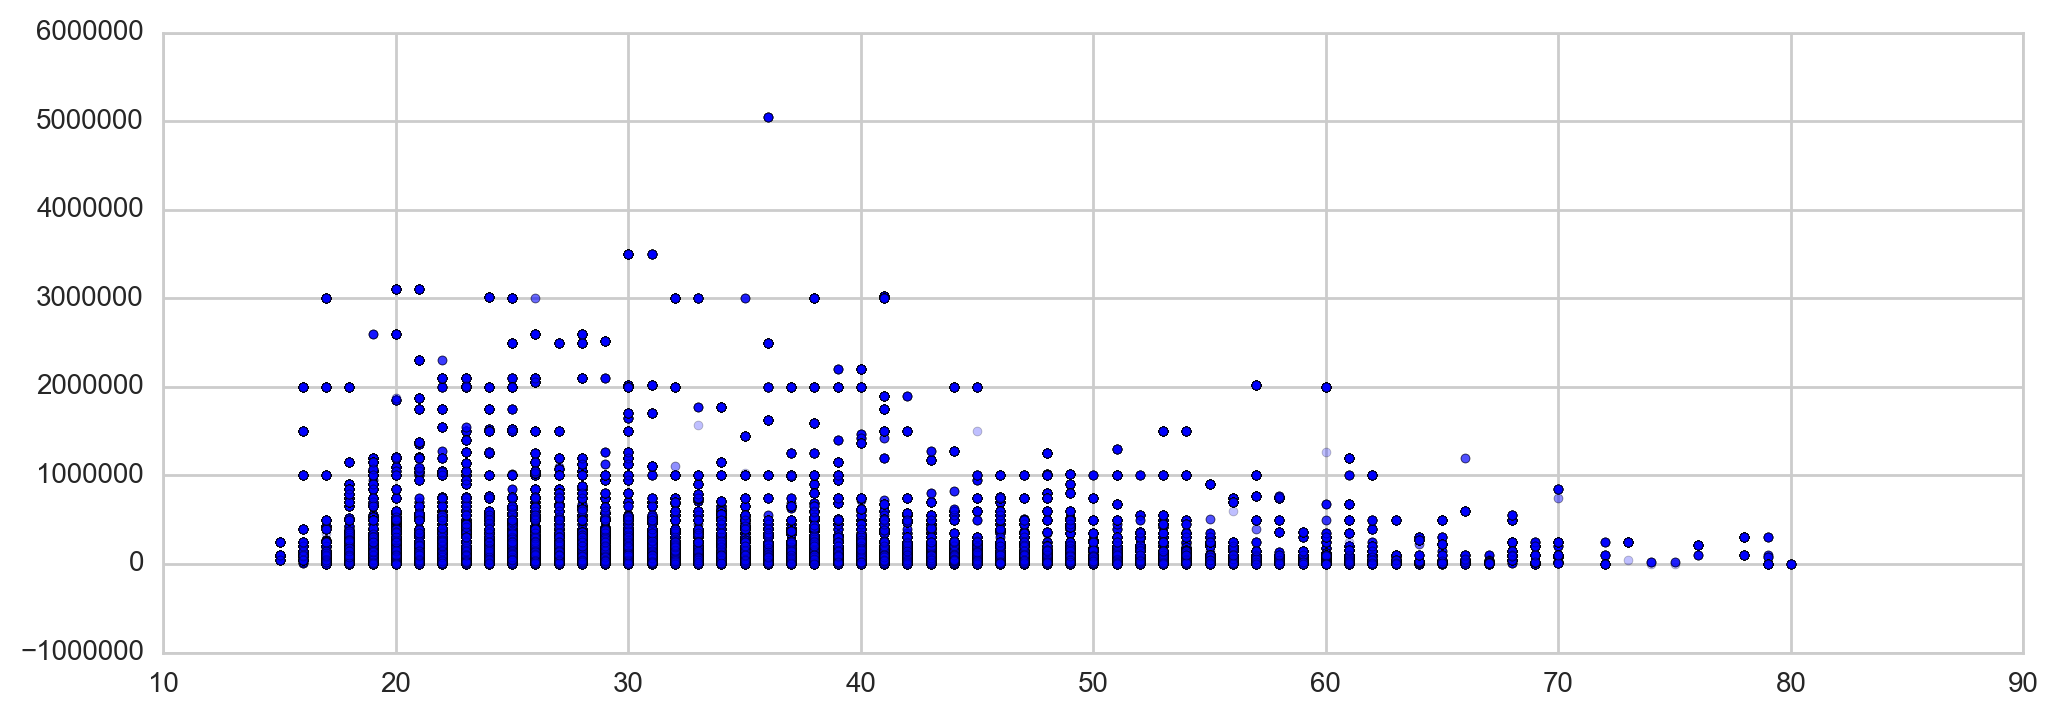

In [66]:
fig, ax = plt.subplots(1,1, figsize=(12,4))

ax.scatter(d['AGE'], d['BOND AMOUNT'], s=10, alpha=0.25)

plt.show()

In [ ]:
#scatter comparing 

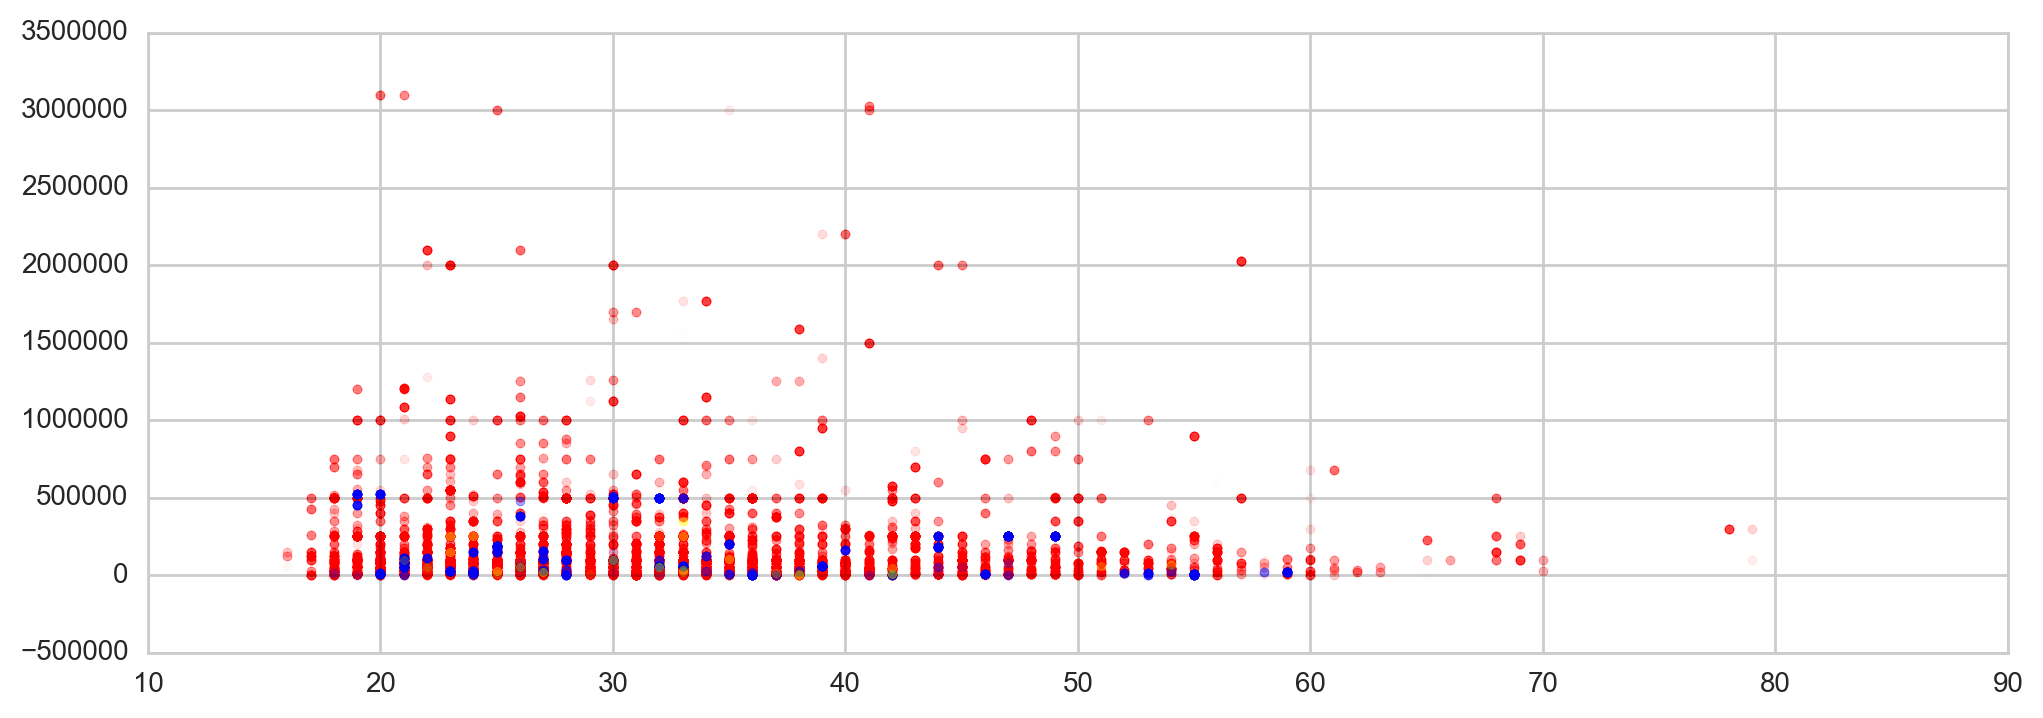

In [86]:
#abg_reset['mean'][abg_reset['GENDER'] == 'M'] #<- Better Way '''USE THIS IN REVIEW DOC FOR MASKING!!!'''

hisp_age = d[d['RACE']=='HISPANIC']['AGE']
asin_age = d[d['RACE']=='ASIAN']['AGE']
amer_age = d[d['RACE']=='AMER IND']['AGE']

hisp_bond = d[d['RACE']=='HISPANIC']['BOND AMOUNT']
asin_bond = d[d['RACE']=='ASIAN']['BOND AMOUNT']
amer_bond = d[d['RACE']=='AMER IND']['BOND AMOUNT']

fig, ax = plt.subplots(1,1, figsize=(12,4))

ax.scatter(hisp_age, hisp_bond, s=10, alpha=0.01, color='red')
ax.scatter(asin_age, asin_bond, s=10, alpha=0.01, color='blue')
ax.scatter(amer_age, amer_bond, s=10, alpha=0.01, color='yellow')

plt.show()

In [ ]:
# Plot something interesting that we havent done

In [88]:
d.head()

,DOWNLOAD DATE,IDENTIFIER,LATEST ADMISSION DATE,RACE,GENDER,AGE,BOND AMOUNT,OFFENSE,FACILITY,DETAINER
0,07/01/2016,ZZEBBEWZ,06/17/2016,WHITE,M,63,5000,"ASSAULT, THIRD DEGREE AM",CORRIGAN CI,NONE
1,07/01/2016,ZZEBBRZC,06/30/2016,BLACK,M,42,500,"FAILURE TO APPEAR, SECOND DEGREE AM",HARTFORD CC,NONE
2,07/01/2016,ZZEBCBHC,06/06/2016,WHITE,M,60,40000,EVADING RESPONSIBILITY M,HARTFORD CC,NONE
3,07/01/2016,ZZEBCCWL,04/25/2016,HISPANIC,M,44,125000,CRIMINAL POSSESSION OF A PISTOL DF,HARTFORD CC,NONE
4,07/01/2016,ZZEBCHBZ,06/21/2016,HISPANIC,M,58,2500,BREACH OF PEACE BM,CORRIGAN CI,NONE


In [ ]:
#Latest Admin Date by Gender

In [114]:
d['AGE'].head()

0    63
1    42
2    60
3    44
4    58
Name: AGE, dtype: int64

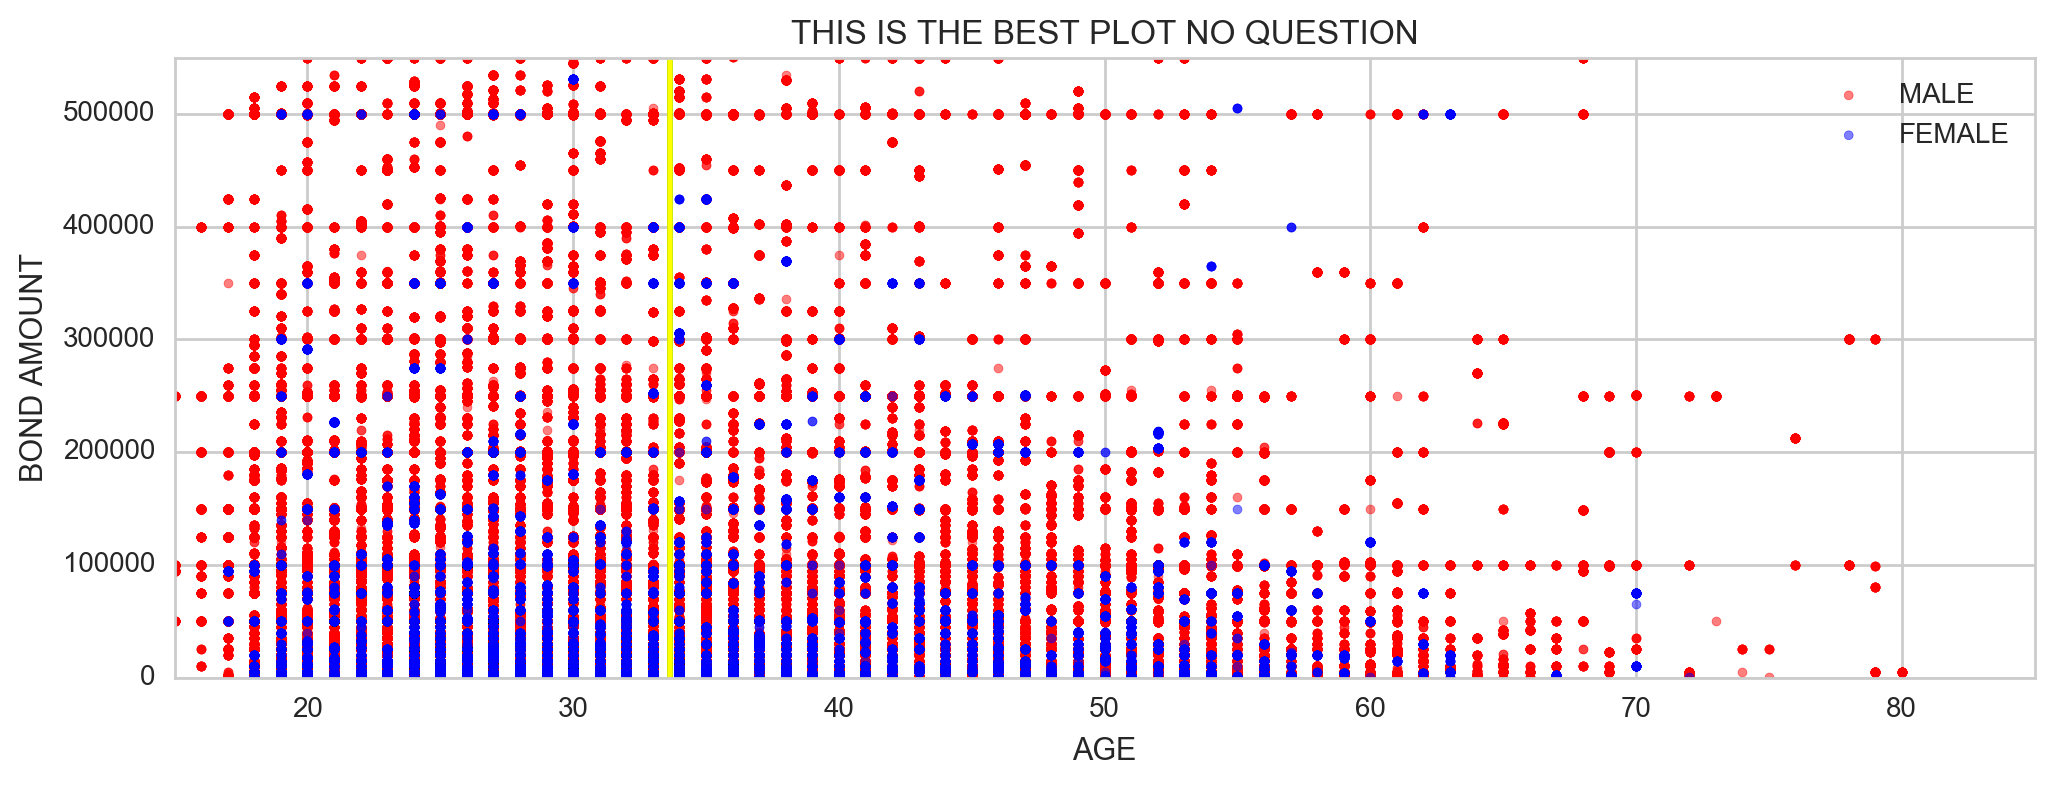

In [143]:
m_age = d[d['GENDER']=='M']['AGE']
f_age = d[d['GENDER']=='F']['AGE']

m_bond = d[d['GENDER']=='M']['BOND AMOUNT']
f_bond = d[d['GENDER']=='F']['BOND AMOUNT']


fig, ax = plt.subplots(1,1, figsize=(12,4))

ax.scatter(m_age, m_bond, s=10, alpha=0.5, color='red', label='MALE')
ax.scatter(f_age, f_bond, s=10, alpha=0.5, color='blue', label='FEMALE')

ax.axvline(x=np.mean(d[d['GENDER']== 'M']['AGE']), lw=2, color='green')
ax.axvline(x=np.mean(d[d['GENDER']== 'F']['AGE']), lw=2, color='yellow')

ax.legend(loc='upper right')
ax.set_xlabel('AGE')
ax.set_ylabel('BOND AMOUNT')
ax.set_xlim([15,85])
ax.set_ylim([0,550000])
ax.set_title('THIS IS THE BEST PLOT NO QUESTION')

plt.show()

In [60]:
import pandas as pd
df = pd.read_csv('/Users/austinwhaley/Desktop/DSI-SF-4-austinmwhaley/datasets/black_friday_incidents/Incidents.csv')

In [3]:
df.head()

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),Store / Location,Cause of Death / Injury
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,Del Amo Fashion Center,Stampede
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Fashion Place Mall,Stampede
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,Wal-Mart,Stampede
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,Toys 'R' Us,Shooting
4,Clarksville Woman Trampled During Black Friday...,http://www.newschannel5.com/global/story.asp?s...,2009,0,1,"Clarksville, Tennessee",Tennessee,Toys 'R' Us,Stampede


In [6]:
# 1 - Inverstigate Types, most common cause of injury by year
gdf = df.groupby(['Year', 'Cause of Death / Injury']).count()
gdf

Name  Link to article  Deaths  Injuries  Place  \
Year Cause of Death / Injury                                                   
2006 Stampede                    2                2       2         2      2   
2008 Shooting                    1                1       1         1      1   
     Stampede                    1                1       1         1      1   
2009 Stampede                    1                1       1         1      1   
2010 Assault                     1                1       1         1      1   
     Stabbing                    1                1       1         1      1   
2011 Car Accident                1                1       1         1      1   
     Fight                       1                1       1         1      1   
     Heart Problems              1                1       1         1      1   
     Pepper Spray                2                2       2         2      2   
     Robbery Attempt             1                1       1         1      1   
     Shooting                    1                1       1         1      1   
     Stampede                    1                1       1         1      1   
2012 Car Accident                2                2       2         2      2   
     Shooting                    1                1       1         1      1   
2013 Car Accident                1                1       1         1      1   
     Fall                        1                1       1         1      1   
     Fight                       1                1       1         1      1   
     Pepper Spray, Fight         1                1       1         1      1   
     Shooting                    2                2       2         2      2   
     Stabbing                    2                2       2         2      2   
     Stampede                    1                1       1         1      1   

                              Place (State)  Store / Location  
Year Cause of Death / Injury                                   
2006 Stampede                             2                 2  
2008 Shooting                             1                 1  
     Stampede                             1                 1  
2009 Stampede                             1                 1  
2010 Assault                              1                 1  
     Stabbing                             1                 1  
2011 Car Accident                         1                 1  
     Fight                                1                 1  
     Heart Problems                       1                 1  
     Pepper Spray                         2                 2  
     Robbery Attempt                      1                 1  
     Shooting                             1                 1  
     Stampede                             1                 1  
2012 Car Accident                         2                 2  
     Shooting                             1                 1  
2013 Car Accident                         1                 1  
     Fall                                 1                 1  
     Fight                                1                 1  
     Pepper Spray, Fight                  1                 1  
     Shooting                             2                 2  
     Stabbing                             2                 2  
     Stampede                             1                 1

In [18]:
gdf.reset_index()

,Year,Cause of Death / Injury,Name,Link to article,Deaths,Injuries,Place,Place (State),Store / Location
0,2006,Stampede,2,2,2,2,2,2,2
1,2008,Shooting,1,1,1,1,1,1,1
2,2008,Stampede,1,1,1,1,1,1,1
3,2009,Stampede,1,1,1,1,1,1,1
4,2010,Assault,1,1,1,1,1,1,1
5,2010,Stabbing,1,1,1,1,1,1,1
6,2011,Car Accident,1,1,1,1,1,1,1
7,2011,Fight,1,1,1,1,1,1,1
8,2011,Heart Problems,1,1,1,1,1,1,1
9,2011,Pepper Spray,2,2,2,2,2,2,2


In [20]:
# 2 - Filter out entries with count > 1
gdf[gdf['Injuries'] > 1]

Name  Link to article  Deaths  Injuries  Place  \
Year Cause of Death / Injury                                                   
2006 Stampede                    2                2       2         2      2   
2011 Pepper Spray                2                2       2         2      2   
2012 Car Accident                2                2       2         2      2   
2013 Shooting                    2                2       2         2      2   
     Stabbing                    2                2       2         2      2   

                              Place (State)  Store / Location  
Year Cause of Death / Injury                                   
2006 Stampede                             2                 2  
2011 Pepper Spray                         2                 2  
2012 Car Accident                         2                 2  
2013 Shooting                             2                 2  
     Stabbing                             2                 2

In [33]:
# 3 - Which years had the highest death toll and followup: place with highest injuries
df.groupby('Year')['Deaths'].sum().sort_values(ascending=False)

Year
2008    3
2012    2
2013    1
2011    1
2010    0
2009    0
2006    0
Name: Deaths, dtype: int64

In [27]:
df.groupby('Place')['Injuries'].sum().sort_values(ascending=False)

Place
Kinston, North Carolina            20
Los Angeles, California            20
Torrance, California               10
Palo Alto, California               5
Belmont, North Carolina             4
Long Island, New York               4
Romeoville, Illinois                2
Rome, New York                      2
Palm Desert, California             2
New Boston, Ohio                    2
Tallahassee, Florida                2
Covington, Washington               2
Clarksville, Tennessee              1
Claypool Hill, Virginia             1
Jackson, Tennessee                  1
El Camino Real, California          1
Fruitport, Michigan                 1
Garfield, New Jersey                1
Murray, Utah                        1
Las Vegas, Nevada                   1
Myrtle Beach, South Carolina        1
Newport, Arkansas                   1
Pahokee, Florida                    1
Rialto, California                  1
San Leandro, California             1
Augusta, Georgia                    1
South 

In [57]:
#clean_state = df['Place'].map(lambda x: x.split(',')[1])

In [61]:
df.insert(7, 'clean_state', df['Place'].map(lambda x: x.split(',')[1]))

In [62]:
df.head()

,Name,Link to article,Year,Deaths,Injuries,Place,Place (State),clean_state,Store / Location,Cause of Death / Injury
0,10 Injured in Southern California Black Friday...,http://abclocal.go.com/kabc/story?section=news...,2006,0,10,"Torrance, California",California,California,Del Amo Fashion Center,Stampede
1,"Salt Lake Tribune, The : Red-hot on Black Friday‎",http://nl.newsbank.com/nl-search/we/Archives?p...,2006,0,1,"Murray, Utah",Utah,Utah,Fashion Place Mall,Stampede
2,Worker dies at Long Island Wal-Mart after bein...,http://www.nydailynews.com/new-york/worker-die...,2008,1,4,"Long Island, New York",New York,New York,Wal-Mart,Stampede
3,Southern California Toys 'R' Us Shooting Leave...,http://www.huffingtonpost.com/2008/11/28/socal...,2008,2,2,"Palm Desert, California",California,California,Toys 'R' Us,Shooting
4,Clarksville Woman Trampled During Black Friday...,http://www.newschannel5.com/global/story.asp?s...,2009,0,1,"Clarksville, Tennessee",Tennessee,Tennessee,Toys 'R' Us,Stampede
